In [1]:
!pip install japanize-matplotlib
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import statsmodels.api as sm
import pymc as pm
import arviz as az
import pytensor.tensor as pt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=afa02692549122846aa1d7f38f73cd3289a602e52eca49014f24fe21c51d4716
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
df = pl.read_csv('/content/drive/MyDrive/study/modern_marketing_research/8/conjoint1.txt', separator='\t')
df.head()

カードNo,6時間,4時間,2年,赤,シルバー,選好順位,全体効用
i64,i64,i64,i64,i64,i64,i64,i64
1,1,0,0,1,0,7,12
2,1,0,0,0,1,9,10
3,1,0,0,0,0,17,2
4,1,0,1,1,0,1,18
5,1,0,1,0,1,6,13


In [3]:
df['全体効用'].max(), df['全体効用'].min()

(18, 1)

In [4]:
target = ['全体効用']
ex_columns = ['6時間', '4時間', '2年', '赤', 'シルバー']
y = df[target].to_numpy()
X = df[ex_columns]
X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()

In [5]:
result.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     28.65
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           2.82e-06
Time:                        06:06:07   Log-Likelihood:                -32.133
No. Observations:                  18   AIC:                             76.27
Df Residuals:                      12   BIC:                             81.61
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5556      1.020     -0.545      0.596      -2.778       1.667
x1             3.5000      1.020      3.432      0.005       1.278       5.722
x2             2.5000      1.020      2.451      0.031       0.278       4.722
x3             6.7778      0.833      8.139      0.000       4.963       8.592
x4             7.6667      1.020      7.517      0.000       5.445       9.889
x5             6.3333      1.020      6.210      0.000       4.111       8.555
==============================================================================
Omnibus:                        1.132   Durbin-Watson:                   2.373
Prob(Omnibus):                  0.568   Jarque-Bera (JB):                1.002
Skew:                          -0.490   Prob(JB):                        0.606
Kurtosis:                       2.386   Cond. No.                         4.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

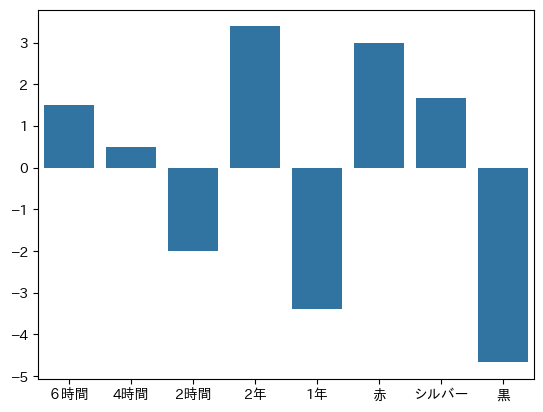

In [6]:
beta = result.params
# 各水準の平均からの偏差を効用とする
u11 = beta[1] - (beta[1]+beta[2])/3
u12 = beta[2] - (beta[1]+beta[2])/3
u13 = - (beta[1]+beta[2])/3
u21 = beta[3] - beta[3]/2
u22 = - beta[3]/2
u31 = beta[4] - (beta[4]+beta[5])/3
u32 = beta[5] - (beta[4]+beta[5])/3
u33 = - (beta[4]+beta[5])/3

utilitys = {'６時間':u11, '4時間':u12, '2時間':u13, '2年':u21, '1年':u22, '赤':u31, 'シルバー':u32, '黒':u33}
sns.barplot(x=utilitys.keys(), y=utilitys.values());

In [7]:
df2 = pl.read_csv('/content/drive/MyDrive/study/modern_marketing_research/8/conjoint2.txt', separator='\t')
df2.head()

回答者id,カードNo,2年,6時間,4時間,赤,シルバー,全体効用,順位
i64,i64,i64,i64,i64,i64,i64,i64,i64
1,1,1,1,0,1,0,9,1
1,2,1,0,1,0,1,7,3
1,3,1,0,0,0,0,3,7
1,4,0,1,0,0,1,5,5
1,5,0,0,1,0,0,2,8


In [8]:
display(df2['回答者id'].unique())
print(df2.shape)

回答者id
i64
1
2
3
4
5
6
7
8
9


(90, 9)


In [9]:
df2.filter(df2[ex_columns].is_duplicated() & ~df2[ex_columns+target].is_duplicated())

回答者id,カードNo,2年,6時間,4時間,赤,シルバー,全体効用,順位
i64,i64,i64,i64,i64,i64,i64,i64,i64
3,2,1,0,1,0,1,6,4
3,9,1,0,0,0,1,7,3
7,1,1,1,0,1,0,7,3
7,2,1,0,1,0,1,9,1
7,8,1,0,1,1,0,6,4
7,9,1,0,0,0,1,8,2
8,3,1,0,0,0,0,5,5
8,4,0,1,0,0,1,3,7
9,5,0,0,1,0,0,4,6


In [10]:
X2 = df2[ex_columns].to_numpy()
X2 = sm.add_constant(X2)
y2 = df2[target].to_numpy()
model2 = sm.OLS(y2, X2)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     74.77
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           1.87e-29
Time:                        06:06:08   Log-Likelihood:                -136.77
No. Observations:                  90   AIC:                             285.5
Df Residuals:                      84   BIC:                             300.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1667      0.319      0.522      0.603      -0.468       0.802
x1             0.3667      0.296      1.240      0.218      -0.221       0.954
x2             1.1333      0.296      3.834      0.000       0.546       1.721
x3             2.2500      0.256      8.790      0.000       1.741       2.759
x4             4.6000      0.296     15.563      0.000       4.012       5.188
x5             3.9000      0.296     13.194      0.000       3.312       4.488
==============================================================================
Omnibus:                        0.084   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.959   Jarque-Bera (JB):                0.259
Skew:                          -0.020   Prob(JB):                        0.879
Kurtosis:                       2.740   Cond. No.                         5.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
from functools import partial

rng = np.random.default_rng(seed=sum(map(ord, "dimensionality")))
draw = partial(pm.draw, random_seed=rng)
normal_dists = pm.Normal.dist(mu=np.array([0, 0, 100]), sigma=np.array([1, 1, 1]))
#draw(normal_dists)

normal_dists = pm.Normal.dist(mu=np.array([0, 1, 2]), sigma=0.1, shape=(3,))
print(draw(normal_dists))
normal_dists = pm.Normal.dist(mu=np.array([0, 1, 2]), sigma=0.1, shape=(4,3))
print(draw(normal_dists))

[0.08018956 0.91614562 2.00470387]
[[ 0.0836363   1.03864665  1.87198616]
 [-0.03629021  0.89946586  1.92385707]
 [ 0.05589797  0.87126291  2.15302833]
 [ 0.02100279  1.20143192  2.07858327]]


In [39]:
num_ex = len(ex_columns)
users = df2['回答者id'].to_numpy() -1
num_user = df2['回答者id'].n_unique()

with pm.Model() as model:
    Y_data = pm.Data('Y_data', df2['全体効用'], mutable=True)
    X_data = pm.Data('X_data', df2[ex_columns], mutable=True)

    beta_mu = pm.Normal('beta_mu', mu=0, sigma=100.0, shape=(num_ex, ))
    beta_sigma = pm.HalfNormal('beta_sigma', sigma=100.0, shape=(num_ex, ))
    beta = pm.Normal('beta', mu=beta_mu, sigma=beta_sigma, shape=(num_user, num_ex))

    intercept_mu = pm.Normal('intercept_mu', mu=0, sigma=100.0)
    intercept_sigma = pm.HalfNormal('intercept_sigma', sigma=100.0)
    intercept = pm.Normal('intercept', mu=intercept_mu, sigma=intercept_sigma, shape=(num_user,))

    mu = pm.Deterministic('mu', pm.math.sum(beta[users]*X_data, axis=1) + intercept[users])
    epsilon = pm.HalfNormal('epsilon', sigma=100.0)
    y = pm.Normal('y', mu=mu, sigma=epsilon, observed=Y_data)

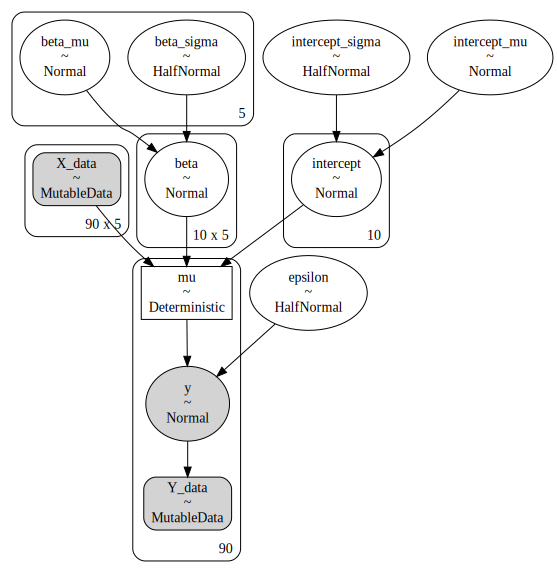

In [40]:
pm.model_to_graphviz(model)

In [41]:
with model:
    idata = pm.sample(chains=4, target_accept=0.99, random_seed=41)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
ERROR:pymc.stats.convergence:There were 48 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.10/dist-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (50), generating only 20 plots
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


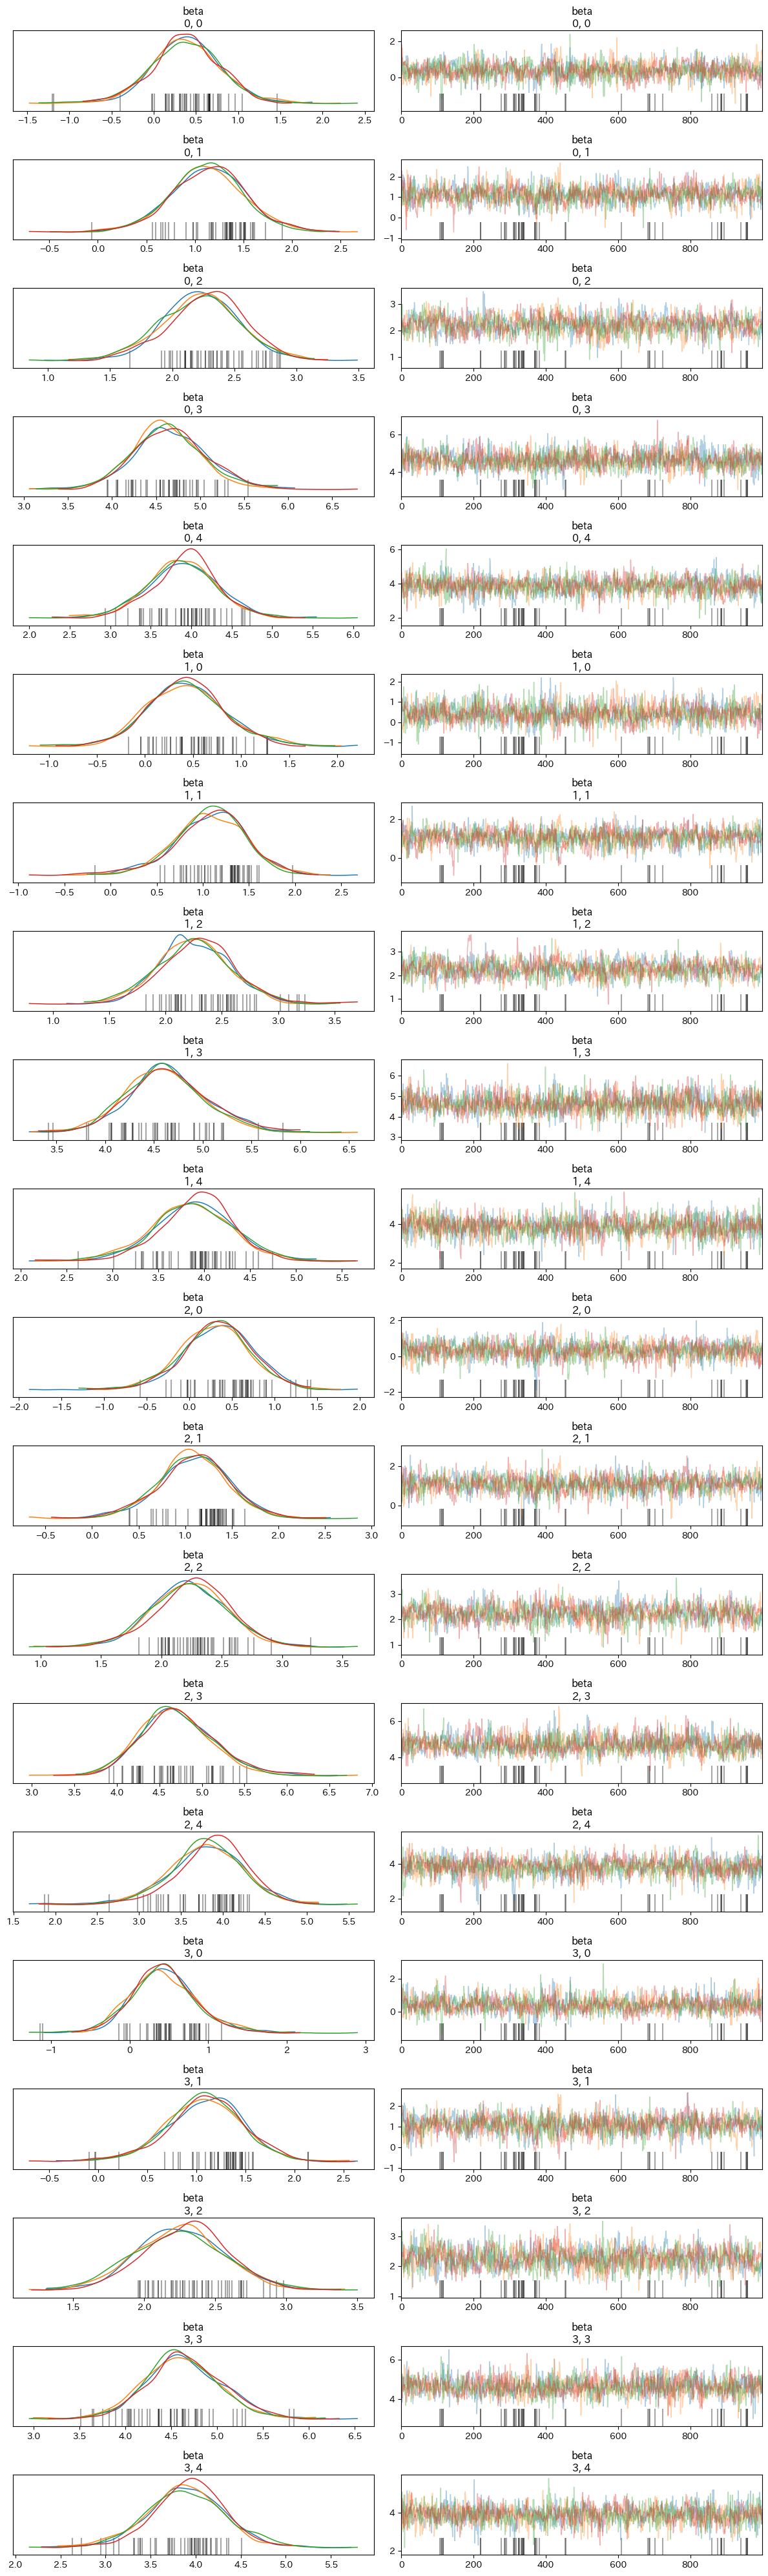

In [42]:
az.plot_trace(idata, var_names=['beta'], compact=False)
plt.tight_layout();

In [43]:
summary = az.summary(idata)
display(summary.query('r_hat>1.1'))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat


In [46]:
az.summary(idata, var_names=['beta'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"beta[0, 0]",0.383,0.417,-0.373,1.179,0.013,0.009,978.0,1667.0,1.00
"beta[0, 1]",1.132,0.391,0.393,1.898,0.013,0.009,902.0,1653.0,1.00
"beta[0, 2]",2.238,0.319,1.642,2.855,0.012,0.008,702.0,1472.0,1.01
"beta[0, 3]",4.646,0.414,3.899,5.453,0.013,0.010,951.0,1678.0,1.01
"beta[0, 4]",3.893,0.431,3.071,4.683,0.013,0.009,1068.0,1587.0,1.01
"beta[1, 0]",0.433,0.421,-0.303,1.295,0.014,0.010,899.0,1607.0,1.00
"beta[1, 1]",1.077,0.393,0.293,1.797,0.015,0.010,742.0,1216.0,1.00
"beta[1, 2]",2.268,0.330,1.625,2.854,0.012,0.009,743.0,1239.0,1.01
"beta[1, 3]",4.632,0.418,3.937,5.519,0.014,0.010,940.0,1786.0,1.01
"beta[1, 4]",3.884,0.437,2.997,4.676,0.014,0.010,984.0,1828.0,1.00


/usr/local/lib/python3.10/dist-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (50) in plot_posterior, generating only 40 plots
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/plots/plot_utils.py:141: UserWarning: The number of rows times columns is larger than necessary
  warnings.warn("The number of rows times columns is larger than necessary")


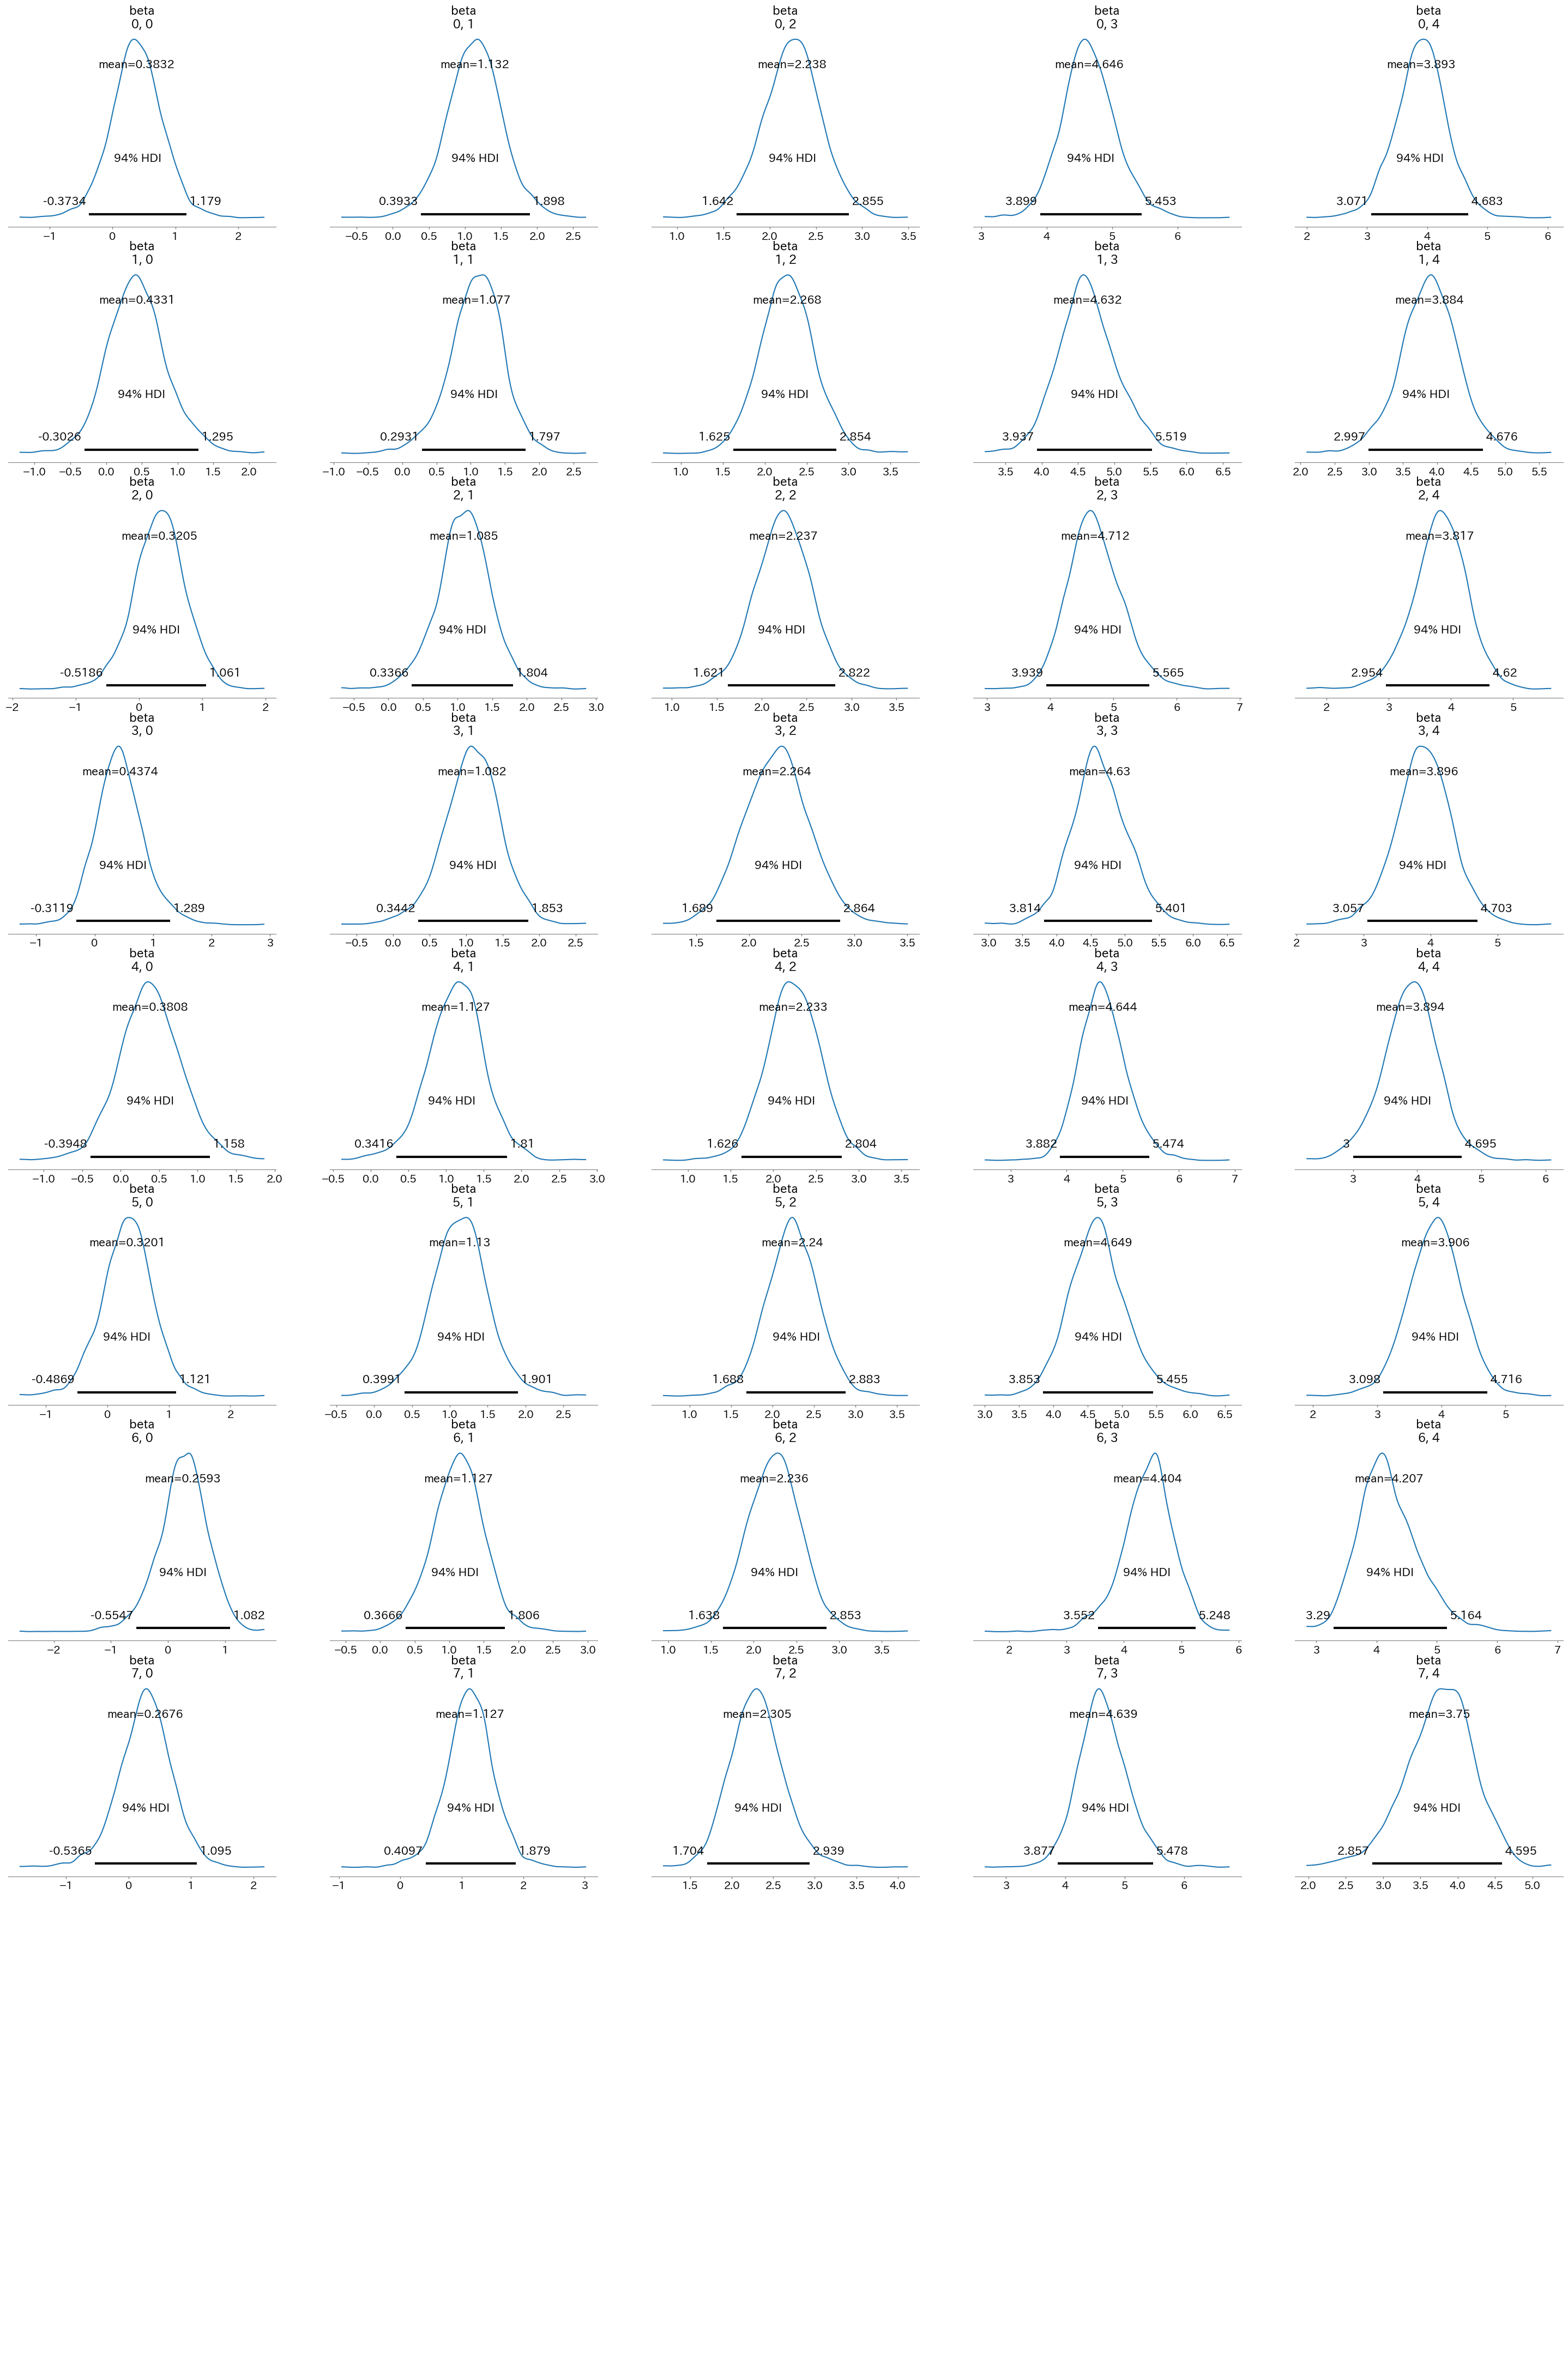

In [54]:
az.plot_posterior(idata, var_names=['beta'], round_to=4, grid=(10, 5));